# Introduction

## Sampling uniformly with n-dimensional unit circles/spheres

In [1]:
using Distributions
using Plots;
pyplot();  # Plots backend

In /home/pprao/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/pprao/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/pprao/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /home/pprao/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/pprao/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylel

Below we sample uniformly within the 2 and 3-dimensional unit circles/spheres. We consider neighbourhoods centered at the origin and the proportion of samples that lie within the neighbourhood.

In [2]:
# source: https://discourse.julialang.org/t/plot-a-circle-with-a-given-radius-with-plots-jl/23295/4
function circle(r, n)
    θ = range(0, stop = 2π, length = n)
    x = r * sin.(θ)
    y = r * cos.(θ)
    return x, y
end

circle (generic function with 1 method)

In [3]:
function random_sample(n)
    θ = rand(Uniform(0, 2*π), n)
    u = rand(Uniform(0, 1), n)
    x = @. sqrt(u) * cos(θ)
    y = @. sqrt(u) * sin(θ)
    return x, y
end

random_sample (generic function with 1 method)

### Plot unit circle in $R^2$ (centered at the origin)
The random samples are contained within this unit circle.

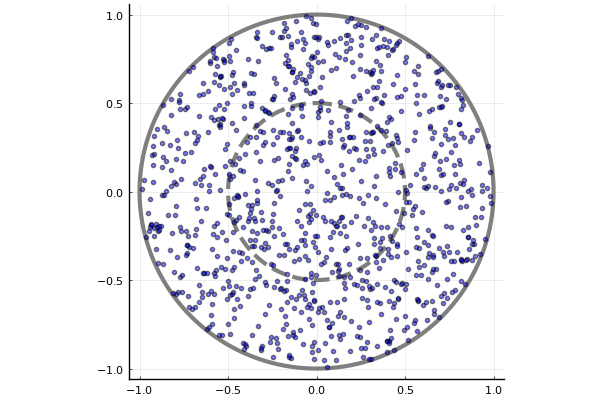

In [12]:
# Select colors using this swatch:
# http://juliagraphics.github.io/Colors.jl/dev/namedcolors/
plot_1 = plot(
    circle(1, 500), seriestype = :shape, lw = 3,
    linecolor = :grey50, legend = false, color = nothing,
    aspect_ratio = 1,
)
# Half-unit circle
plot!(
    circle(0.5, 500), seriestype = :shape, lw = 3, 
    linecolor = :grey50, linestyle = :dash, legend = false, 
    color = nothing, aspect_ratio = 1,
)
# Scatter points of random samples (2D)
x, y = random_sample(1000)
plot!(
    x, y, seriestype = :scatter, alpha = 0.5,
    markersize = 3, markercolor = :blue,
)

In [13]:
# Proportion within neighbourhood
p = sum(@. ((x^2 + y^2) <= 0.5^2) / 1000)
p

0.2640000000000001

### Plot unit sphere in $R^3$ (centered at the origin)

In [15]:
# Formula for cartesian coordinates of a sphere from spherical coordinates
# r = radius, ϕ = azimuth, θ = inclination

function sphere(r, n)
    ϕ = range(0, 2π, length = n)
    θ = range(0, π, length = n)
    # Ensure that x, y, z are matrices so that we can plot surfaces
    x = @. r * cos(ϕ) * sin(θ)'
    y = @. r * sin(ϕ) * sin(θ)'
    z = @. r * cos(θ)'
    return x, y, z
end


function random_sample_sphere(n)
    ϕ = rand(Uniform(0, 2*π), n)
    u = rand(Uniform(0, 1), n)
    θ = acos.(rand(Uniform(-1, 1), n))
    r = u .^ (1/3)
    
    x = @. r * cos(ϕ) * sin(θ)
    y = @. r * sin(ϕ) * sin(θ)
    z = @. r * cos(θ)
    return x, y, z
end

random_sample_sphere (generic function with 1 method)

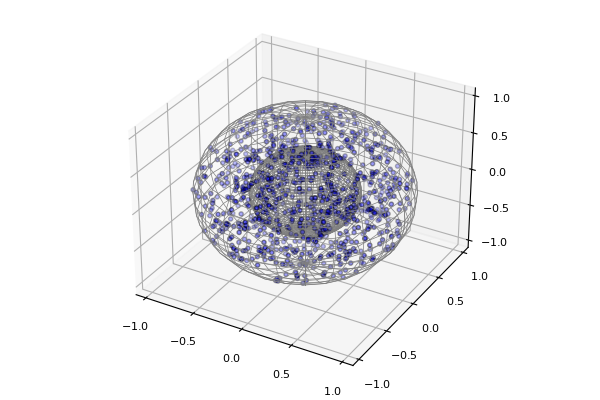

In [17]:
# Plot unit sphere
plot_2 = plot(
    sphere(1, 25), seriestype = :wireframe, legend = false,
    fillalpha = 0.0, lw = 0.5, linecolor = :grey50,
)

# Generate plot
plot!(
    sphere(0.5, 50), seriestype = :wireframe, legend = false,
    fillalpha = 0.0, lw = 0.5, linecolor = :grey50,
)

# Uniform sampling inside the 3D sphere
x, y, z = random_sample_sphere(1000)
plot!(
    x, y, z, seriestype = :scatter, alpha = 0.5,
    markersize = 3, markercolor = :blue,
)

In [18]:
# Proportion within neighbourhood
p = sum(@. ((x^2 + y^2 + z^2) <= 0.5^2) / 1000)
p

0.11300000000000002

## Load MNIST dataset

In [19]:
"""
# using MLDatasets

train_x, train_y = MNIST.traindata()
println(size(train_x))

# We can display a sample MNIST image and its label using `ImageCore` 
# as shown below.
using ImageCore

MNIST.convert2image(train_x[:, :, 2])
"""

"# using MLDatasets\n\ntrain_x, train_y = MNIST.traindata()\nprintln(size(train_x))\n\n# We can display a sample MNIST image and its label using `ImageCore` \n# as shown below.\nusing ImageCore\n\nMNIST.convert2image(train_x[:, :, 2])\n"

In [20]:
# train_y[2]

## Swiss roll transformation

In [48]:
function make_swiss_roll(n)
    """
    Continuous swiss-roll shaped manifold
    """
    t = range(0, 1, length = n)
    u = t
    v = @. 3π / 2 * (0.1 + 2t)
    # Swiss roll transformation
    x = @. -v * cos(v)'
    y = u'
    z = @. v * sin(v)'
    return x, y, z
end

make_swiss_roll (generic function with 1 method)

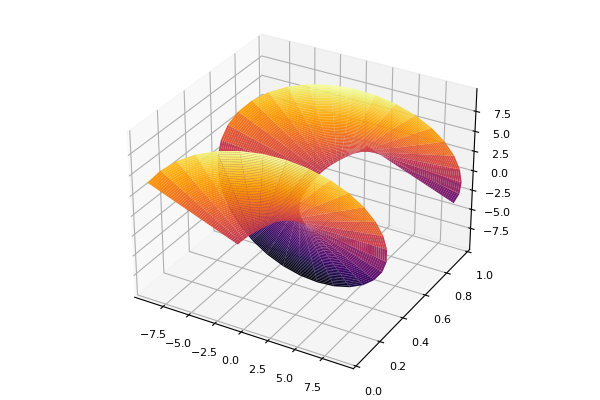

In [49]:
plot_3 = plot(
    make_swiss_roll(50), seriestype = :surface, legend = false,
)